# Genrify Project
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API.

# Data Loading Using Pandas

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 2000
Number of attributes: 12
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	speechiness
	tempo
	time_signature
	valence


In [70]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Dafnis Prieto,About The Monks,0.156,0.480,323133,0.829,0.127000,0,0.3360,-7.427,0.0400,136.779,4,0.718,jazz
1,Ella Fitzgerald,Dream A Little Dream Of Me,0.918,0.549,187693,0.169,0.000000,9,0.1590,-13.433,0.0779,79.318,4,0.366,jazz
2,Kamasi Washington,Change of the Guard,0.103,0.292,735733,0.754,0.852000,9,0.1050,-8.886,0.0651,116.994,4,0.368,jazz
3,Gerry Mulligan,Lullaby Of The Leaves - 1998 Digital Remaster,0.972,0.439,195160,0.082,0.893000,0,0.0913,-17.066,0.0407,124.690,4,0.494,jazz
4,Miles Davis,Bye Bye Blackbird,0.564,0.632,474627,0.320,0.000004,0,0.0903,-10.563,0.0461,122.516,4,0.370,jazz


# Target variable

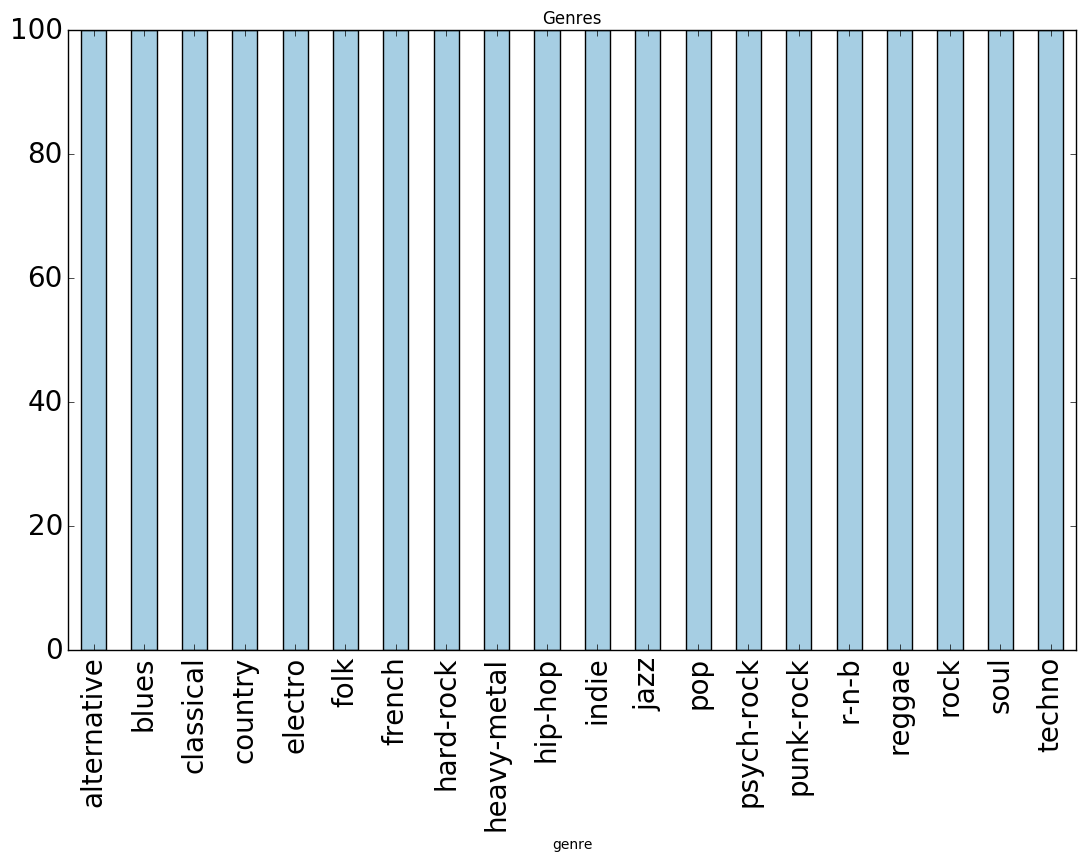

In [71]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [72]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
target_vect = np.array(pd_target_vect)
target_vect

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# Acousticness attribute

<IPython.core.display.Javascript object>


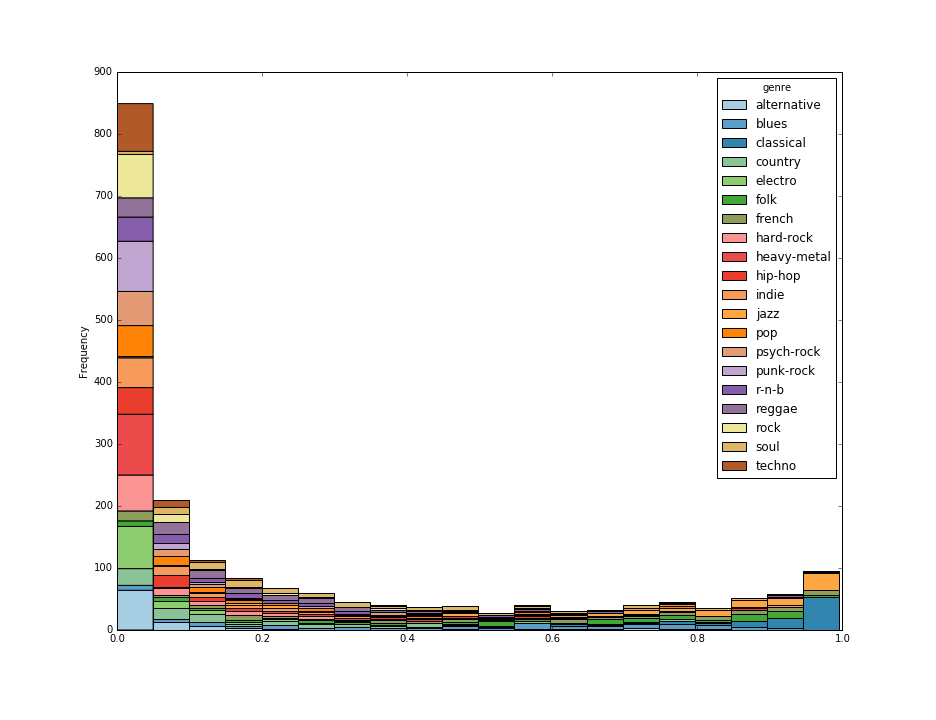

In [74]:
%matplotlib notebook
acousticness = data[['acousticness']]
acousticness_genre = data.loc[:,['acousticness','genre']]

acousticness_by_genre = acousticness_genre.pivot(columns='genre', values='acousticness')
acousticness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [75]:
acousticness.describe()

,acousticness
count,2000.000000
mean,0.255259
std,0.321542
min,0.000001
25%,0.009033
50%,0.082850
75%,0.443250
max,0.996000


# Danceability attribute

<IPython.core.display.Javascript object>


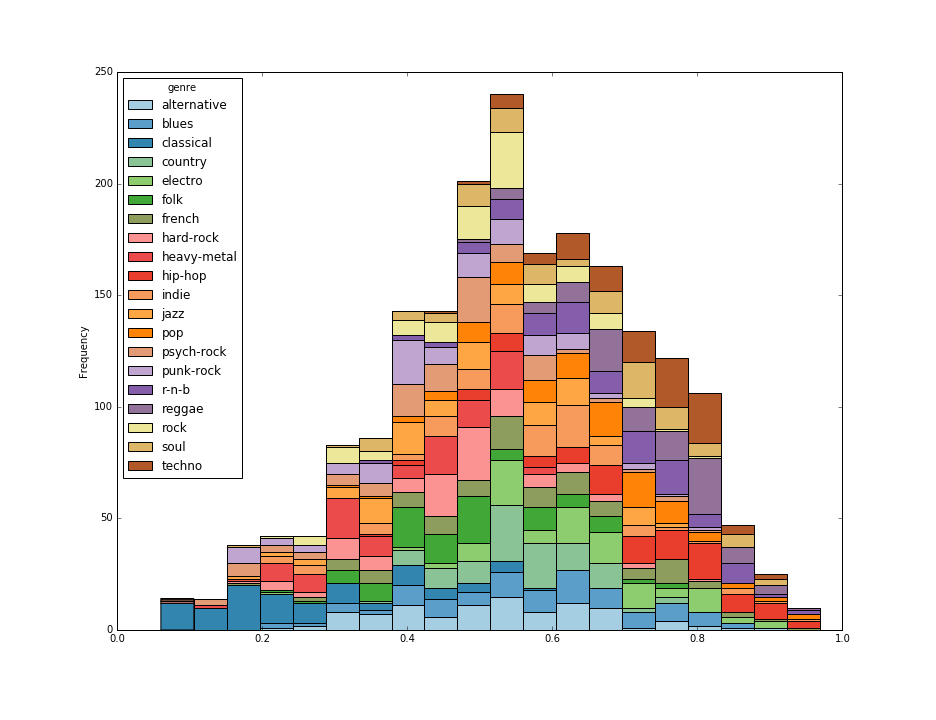

In [76]:
danceability = data[['danceability']]
danceability_genre = data.loc[:,['danceability','genre']]

danceability_by_genre = danceability_genre.pivot(columns='genre', values='danceability')
danceability_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [77]:
danceability.describe()

,danceability
count,2000.000000
mean,0.552091
std,0.175359
min,0.060500
25%,0.437000
50%,0.552500
75%,0.681250
max,0.969000


# Duration attribute

<IPython.core.display.Javascript object>


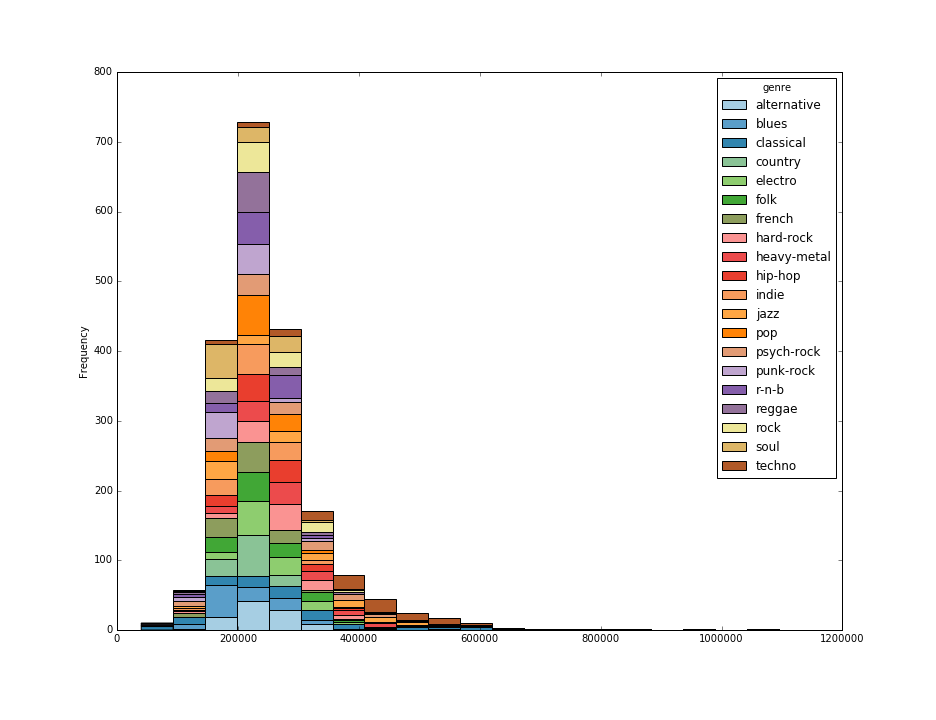

In [78]:
duration_ms = data[['duration_ms']]
duration_ms_genre = data.loc[:,['duration_ms','genre']]

duration_ms_by_genre = duration_ms_genre.pivot(columns='genre', values='duration_ms')
duration_ms_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [79]:
duration_ms.describe()

,duration_ms
count,2.000000e+03
mean,2.517374e+05
std,8.841857e+04
min,4.013300e+04
25%,1.998402e+05
50%,2.335130e+05
75%,2.792435e+05
max,1.094733e+06


# Energy attribute

<IPython.core.display.Javascript object>


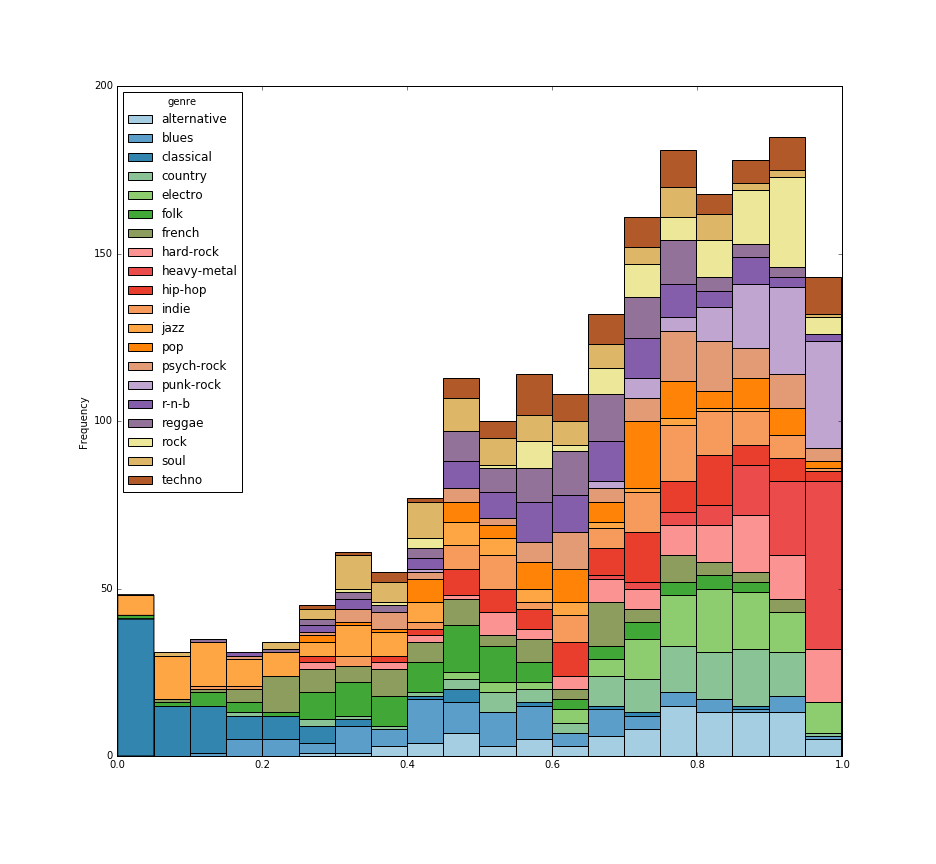

In [80]:
energy = data[['energy']]
energy_genre = data.loc[:,['energy','genre']]

energy_by_genre = energy_genre.pivot(columns='genre', values='energy')
energy_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,12],bins=20)

In [81]:
energy.describe()

,energy
count,2000.000000
mean,0.647722
std,0.250182
min,0.001060
25%,0.485000
50%,0.705000
75%,0.849250
max,0.998000


# Instrumentalness attribute

<IPython.core.display.Javascript object>


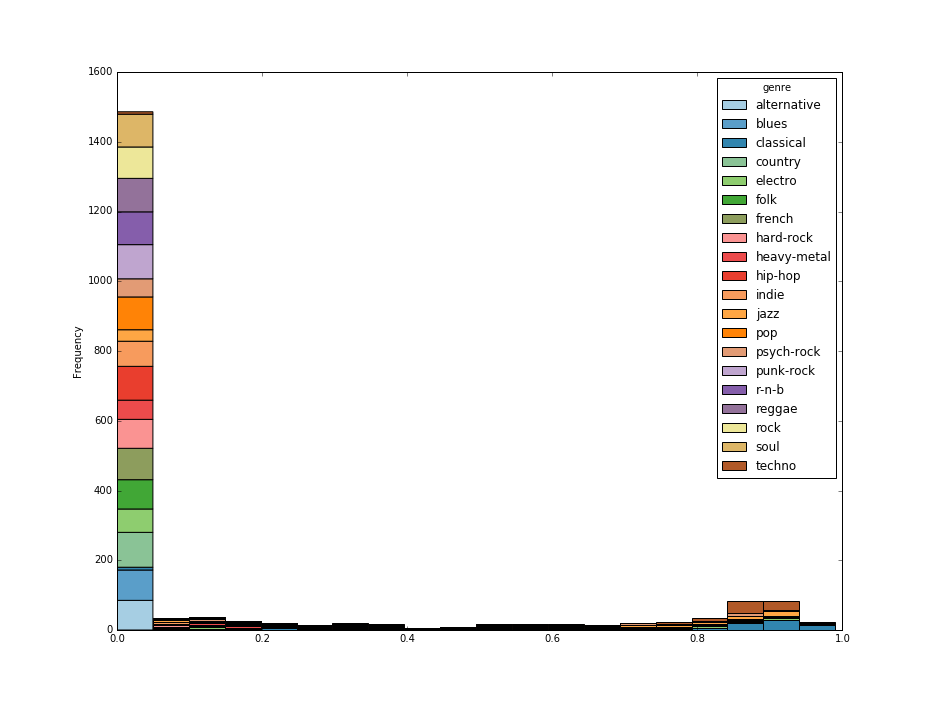

In [82]:
instrumentalness = data[['instrumentalness']]
instrumentalness_genre = data.loc[:,['instrumentalness','genre']]

instrumentalness_by_genre = instrumentalness_genre.pivot(columns='genre', values='instrumentalness')
instrumentalness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [83]:
instrumentalness.describe()

,instrumentalness
count,2000.000000
mean,0.155753
std,0.304511
min,0.000000
25%,0.000000
50%,0.000214
75%,0.066050
max,0.990000


# Key attribute

<IPython.core.display.Javascript object>


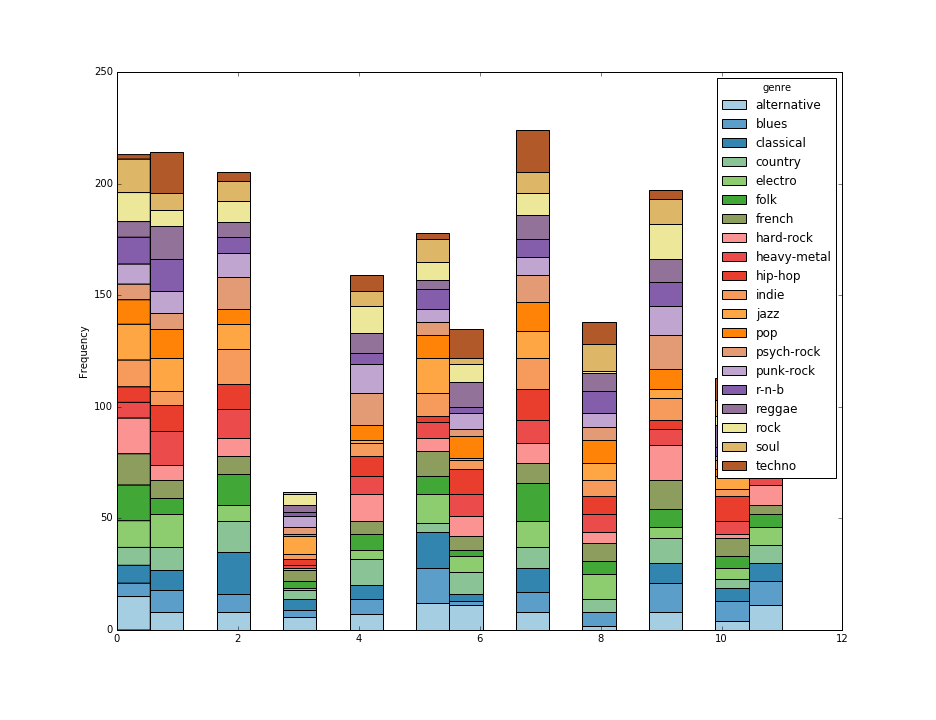

In [84]:
key = data[['key']]
key_genre = data.loc[:,['key','genre']]

key_by_genre = key_genre.pivot(columns='genre', values='key')
key_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [85]:
key.describe()

,key
count,2000.00000
mean,5.25150
std,3.53334
min,0.00000
25%,2.00000
50%,5.00000
75%,8.00000
max,11.00000


# Liveness attribute

<IPython.core.display.Javascript object>


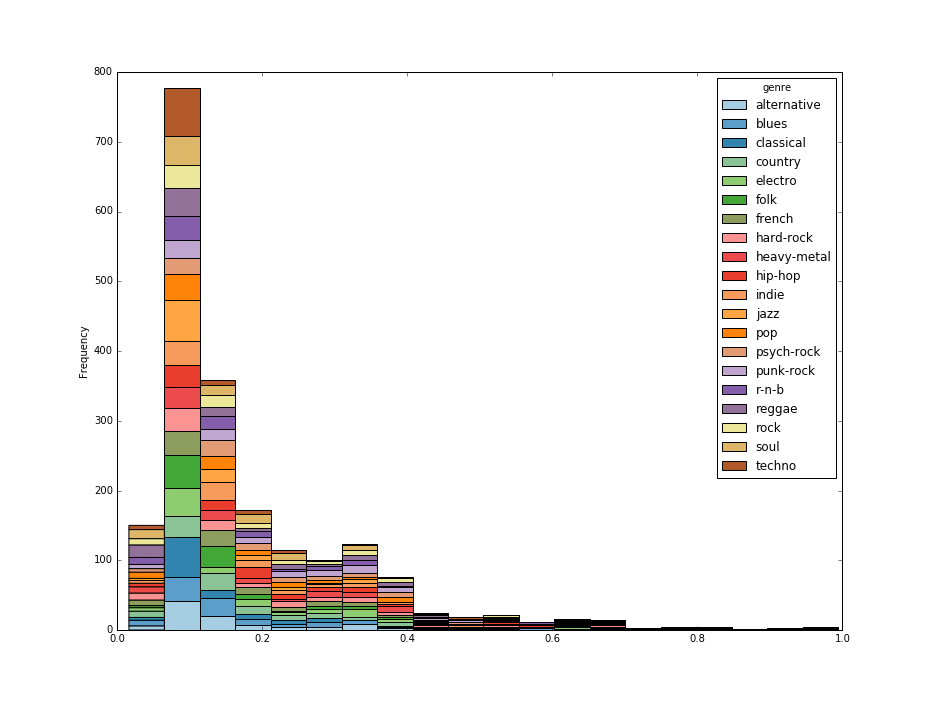

In [86]:
liveness = data[['liveness']]
liveness_genre = data.loc[:,['liveness','genre']]

liveness_by_genre = liveness_genre.pivot(columns='genre', values='liveness')
liveness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [87]:
liveness.describe()

,liveness
count,2000.000000
mean,0.180097
std,0.143345
min,0.016400
25%,0.090900
50%,0.120500
75%,0.227250
max,0.994000


# Loudness attribute

<IPython.core.display.Javascript object>


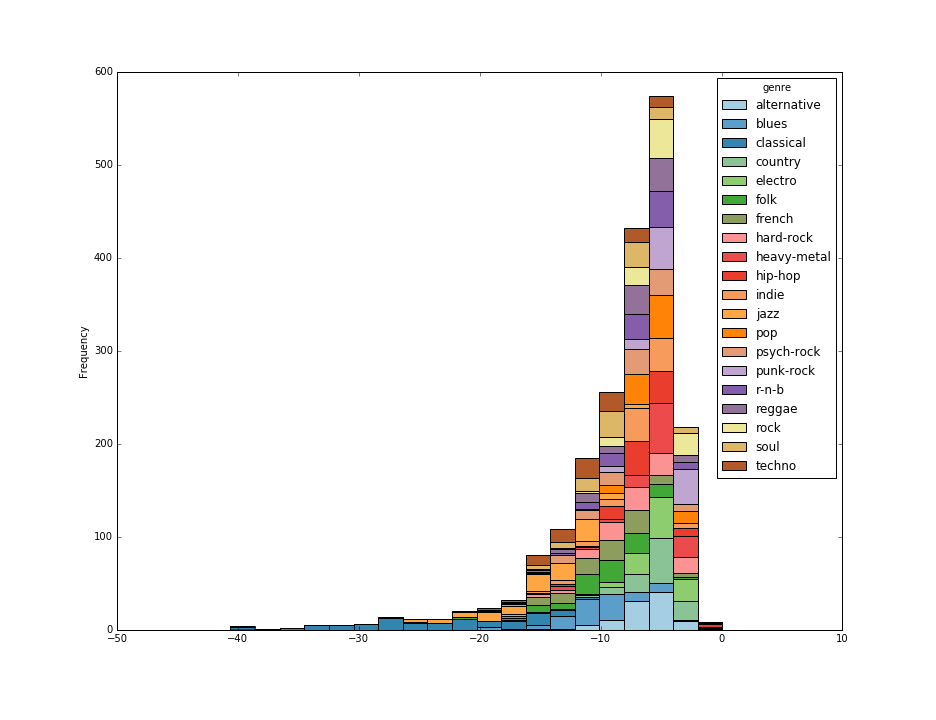

In [88]:
loudness = data[['loudness']]
loudness_genre = data.loc[:,['loudness','genre']]

loudness_by_genre = loudness_genre.pivot(columns='genre', values='loudness')
loudness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [89]:
loudness.describe()

,loudness
count,2000.000000
mean,-8.396225
std,5.245419
min,-40.607000
25%,-10.232000
50%,-6.844500
75%,-4.998750
max,0.078000


# Speechiness attribute

<IPython.core.display.Javascript object>


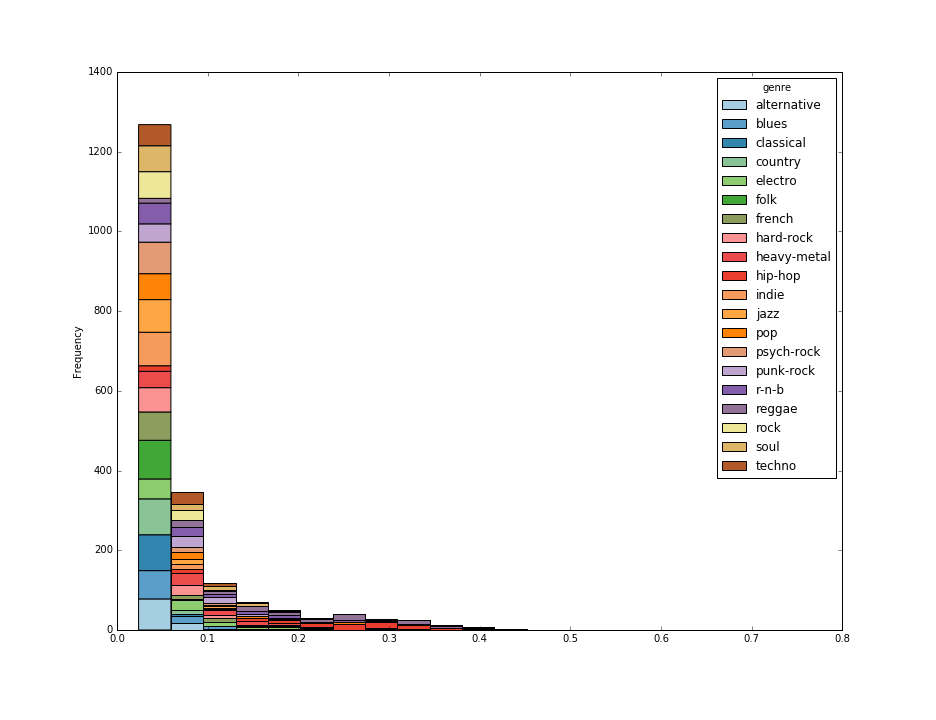

In [90]:
speechiness = data[['speechiness']]
speechiness_genre = data.loc[:,['speechiness','genre']]

speechiness_by_genre = speechiness_genre.pivot(columns='genre', values='speechiness')
speechiness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [91]:
speechiness.describe()

,speechiness
count,2000.000000
mean,0.076081
std,0.072537
min,0.023800
25%,0.036275
50%,0.047850
75%,0.078600
max,0.737000


# Tempo attribute

<IPython.core.display.Javascript object>


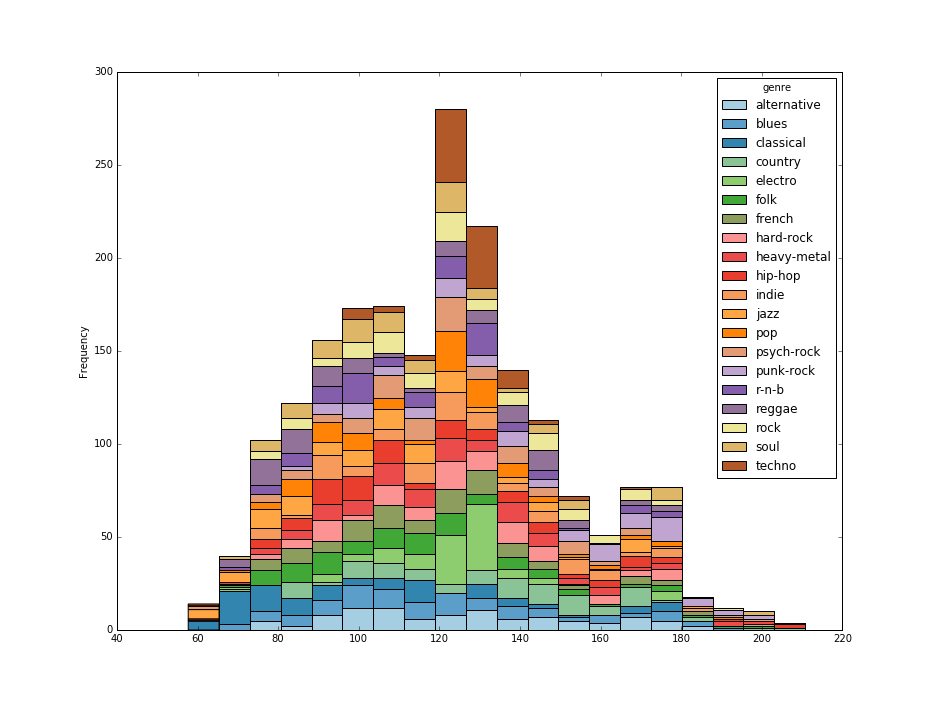

In [92]:
tempo = data[['tempo']]
tempo_genre = data.loc[:,['tempo','genre']]

tempo_by_genre = tempo_genre.pivot(columns='genre', values='tempo')
tempo_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [93]:
tempo.describe()

,tempo
count,2000.000000
mean,120.906454
std,28.884979
min,57.671000
25%,98.811750
50%,120.205000
75%,138.335000
max,210.750000


# Time Signature attribute

<IPython.core.display.Javascript object>


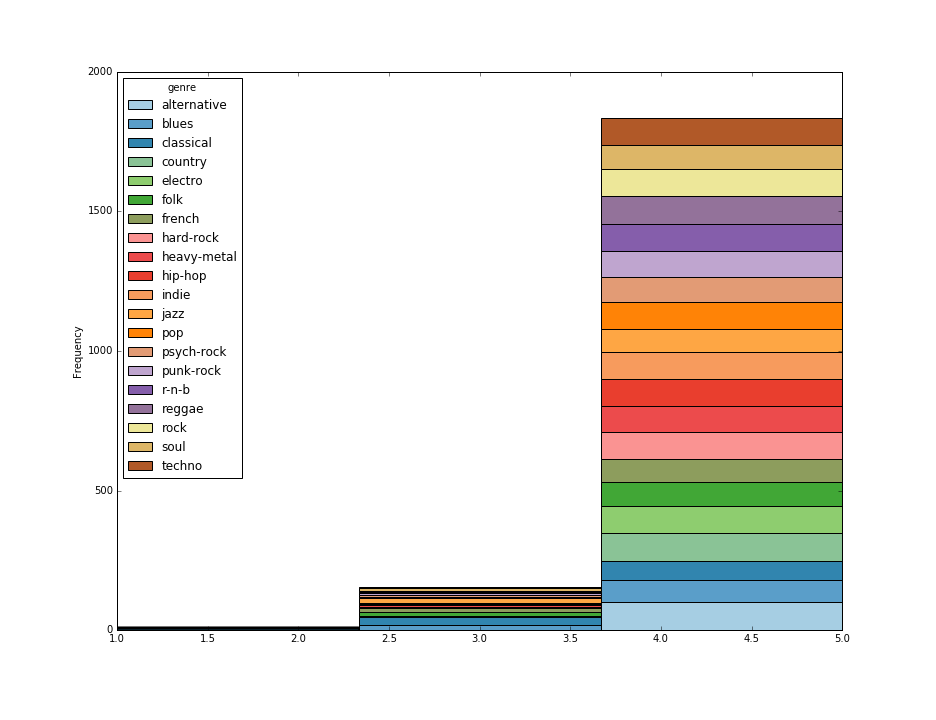

In [94]:
time_signature = data[['time_signature']]
#time_signature.plot(kind='bar',figsize=[13,8])
time_signature_genre = data.loc[:,['time_signature','genre']]

time_signature_by_genre = time_signature_genre.pivot(columns='genre', values='time_signature')
time_signature_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=3)


In [95]:
time_signature.describe()

,time_signature
count,2000.000000
mean,3.923000
std,0.363507
min,1.000000
25%,4.000000
50%,4.000000
75%,4.000000
max,5.000000


# Valence attribute

<IPython.core.display.Javascript object>


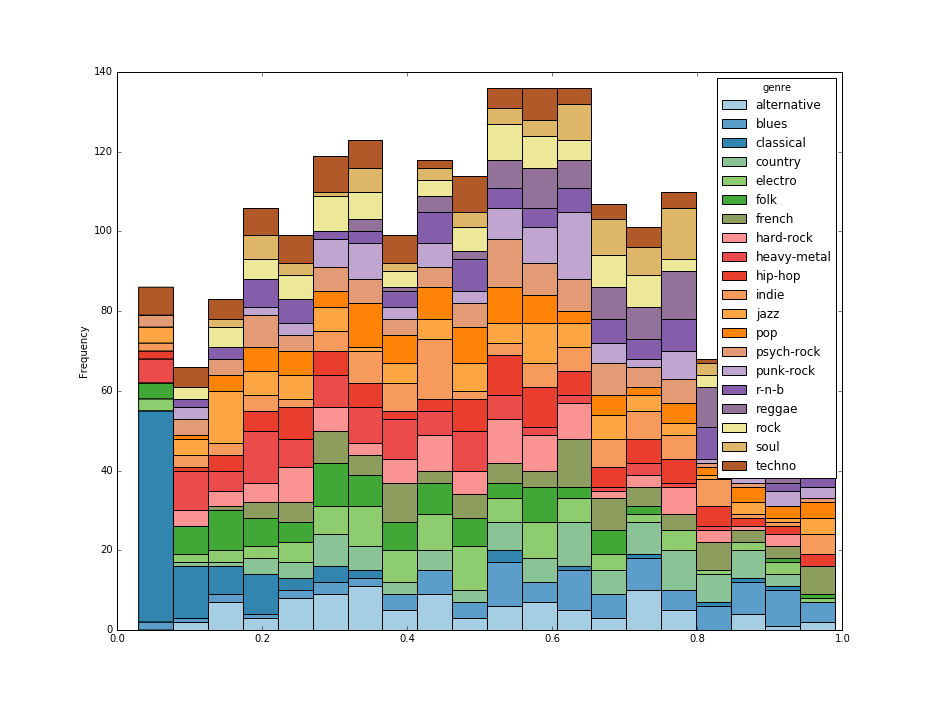

In [96]:
valence = data[['valence']]
valence_genre = data.loc[:,['valence','genre']]

valence_by_genre = valence_genre.pivot(columns='genre', values='valence')
valence_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [97]:
valence.describe()

,valence
count,2000.000000
mean,0.495863
std,0.249713
min,0.029800
25%,0.297000
50%,0.504000
75%,0.688000
max,0.990000
